Prisoner's Dilemma Network Analysis
---------------------------

Academic articles can have from 1 to more than 20 articles. Some fields tend today
have more collaborations than others, in this section the connectivity of the
authors within the prisoner's dilemma field is examined. Over the \uniquetitles
articles within the data set the total number of unique authors is \authors.

Note that the authors name had to be cleaned before this analysis could be held.
Several journals use different methods of writing an authors name. For this reason
the Levenshtein Distance was used to calculated the difference between name 
entries. A manual check was performed before replacing the flagged entries
by the Levenshtein Distance.

The authors will be represented in a network. The network has sets of vertices \(V\) and edges \(E\). The 
\authors vertices represent each of the unique authors. The vertices are connected
with an edge if and only if two authors have written together. Weights have been
applied to both the vertices and the edges. Vertices' weight corresponds to 
the number of papers the author has within the data set and the edge weight
to the number of times the author wrote together.

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools
import collections
import random 

%matplotlib inline

In [18]:
import numpy as np

In [19]:
import matplotlib.patches as mpatches
import matplotlib.lines as lines

legend_properties = {'weight':'bold'}

Prepering the data
------------------

In [20]:
df = pd.read_json('../data/data_dec_2017_clean.json')

In [21]:
# names to lower case
df.author = df.author.str.lower()

In [22]:
authors = len(df.author.unique())
authors

2101

In [7]:
file = open("/home/nightwing/rsc/Literature-Article/assets/authors.txt", 'w')
file.write('{}'.format(authors))
file.close()

Co-authors
----------

In [23]:
pairs = []
for _, d in df.groupby('unique_key'):
    pairs += tuple(sorted(list(itertools.combinations(d['author'].unique(), 2))))
    co_authors = collections.Counter(pairs)

For creating and analysing the [network](https://networkx.github.io/) the python library networkx will be used though out 
the notebook.

In [24]:
authors_num_papers = df.groupby(['author', 'unique_key']).size().reset_index().groupby('author').count()
authors_num_papers = authors_num_papers.drop(0, axis=1)

In [25]:
G = nx.Graph()
_ = [G.add_node(name) for name, w in zip(df.author, authors_num_papers['unique_key'].values)]
_ = [G.add_edge(*pair[0]) for pair in co_authors.items()]

In [16]:
file = open("/home/nightwing/rsc/Literature-Article/assets/prisoners_edges.txt", 'w')
file.write('{}'.format(len(G.edges())))
file.close()

In [26]:
number_of_author = len(df.author.unique())
number_of_author 

2101

**Order, size, density and average degree.**

In [11]:
order, size = G.order(), G.size()

In [12]:
order, size

(1967, 3174)

In [30]:
for measure, label in zip([order, size, nx.density(G), float(2 * size / order)],
                          ['vertices', 'edges', 'density', 'av_degree']):
    file = open("/home/nightwing/rsc/Literature-Article/assets/prisoners_{}.tex".format(label),
                'w')
    file.write('{}'.format(measure))
    file.close()

In [13]:
nx.write_gml(G, "../data/prisoners_network.gml")

Illustrating co-authors network
------------------------

In [14]:
sizes = [s * 100 for s in authors_num_papers['unique_key'].values]

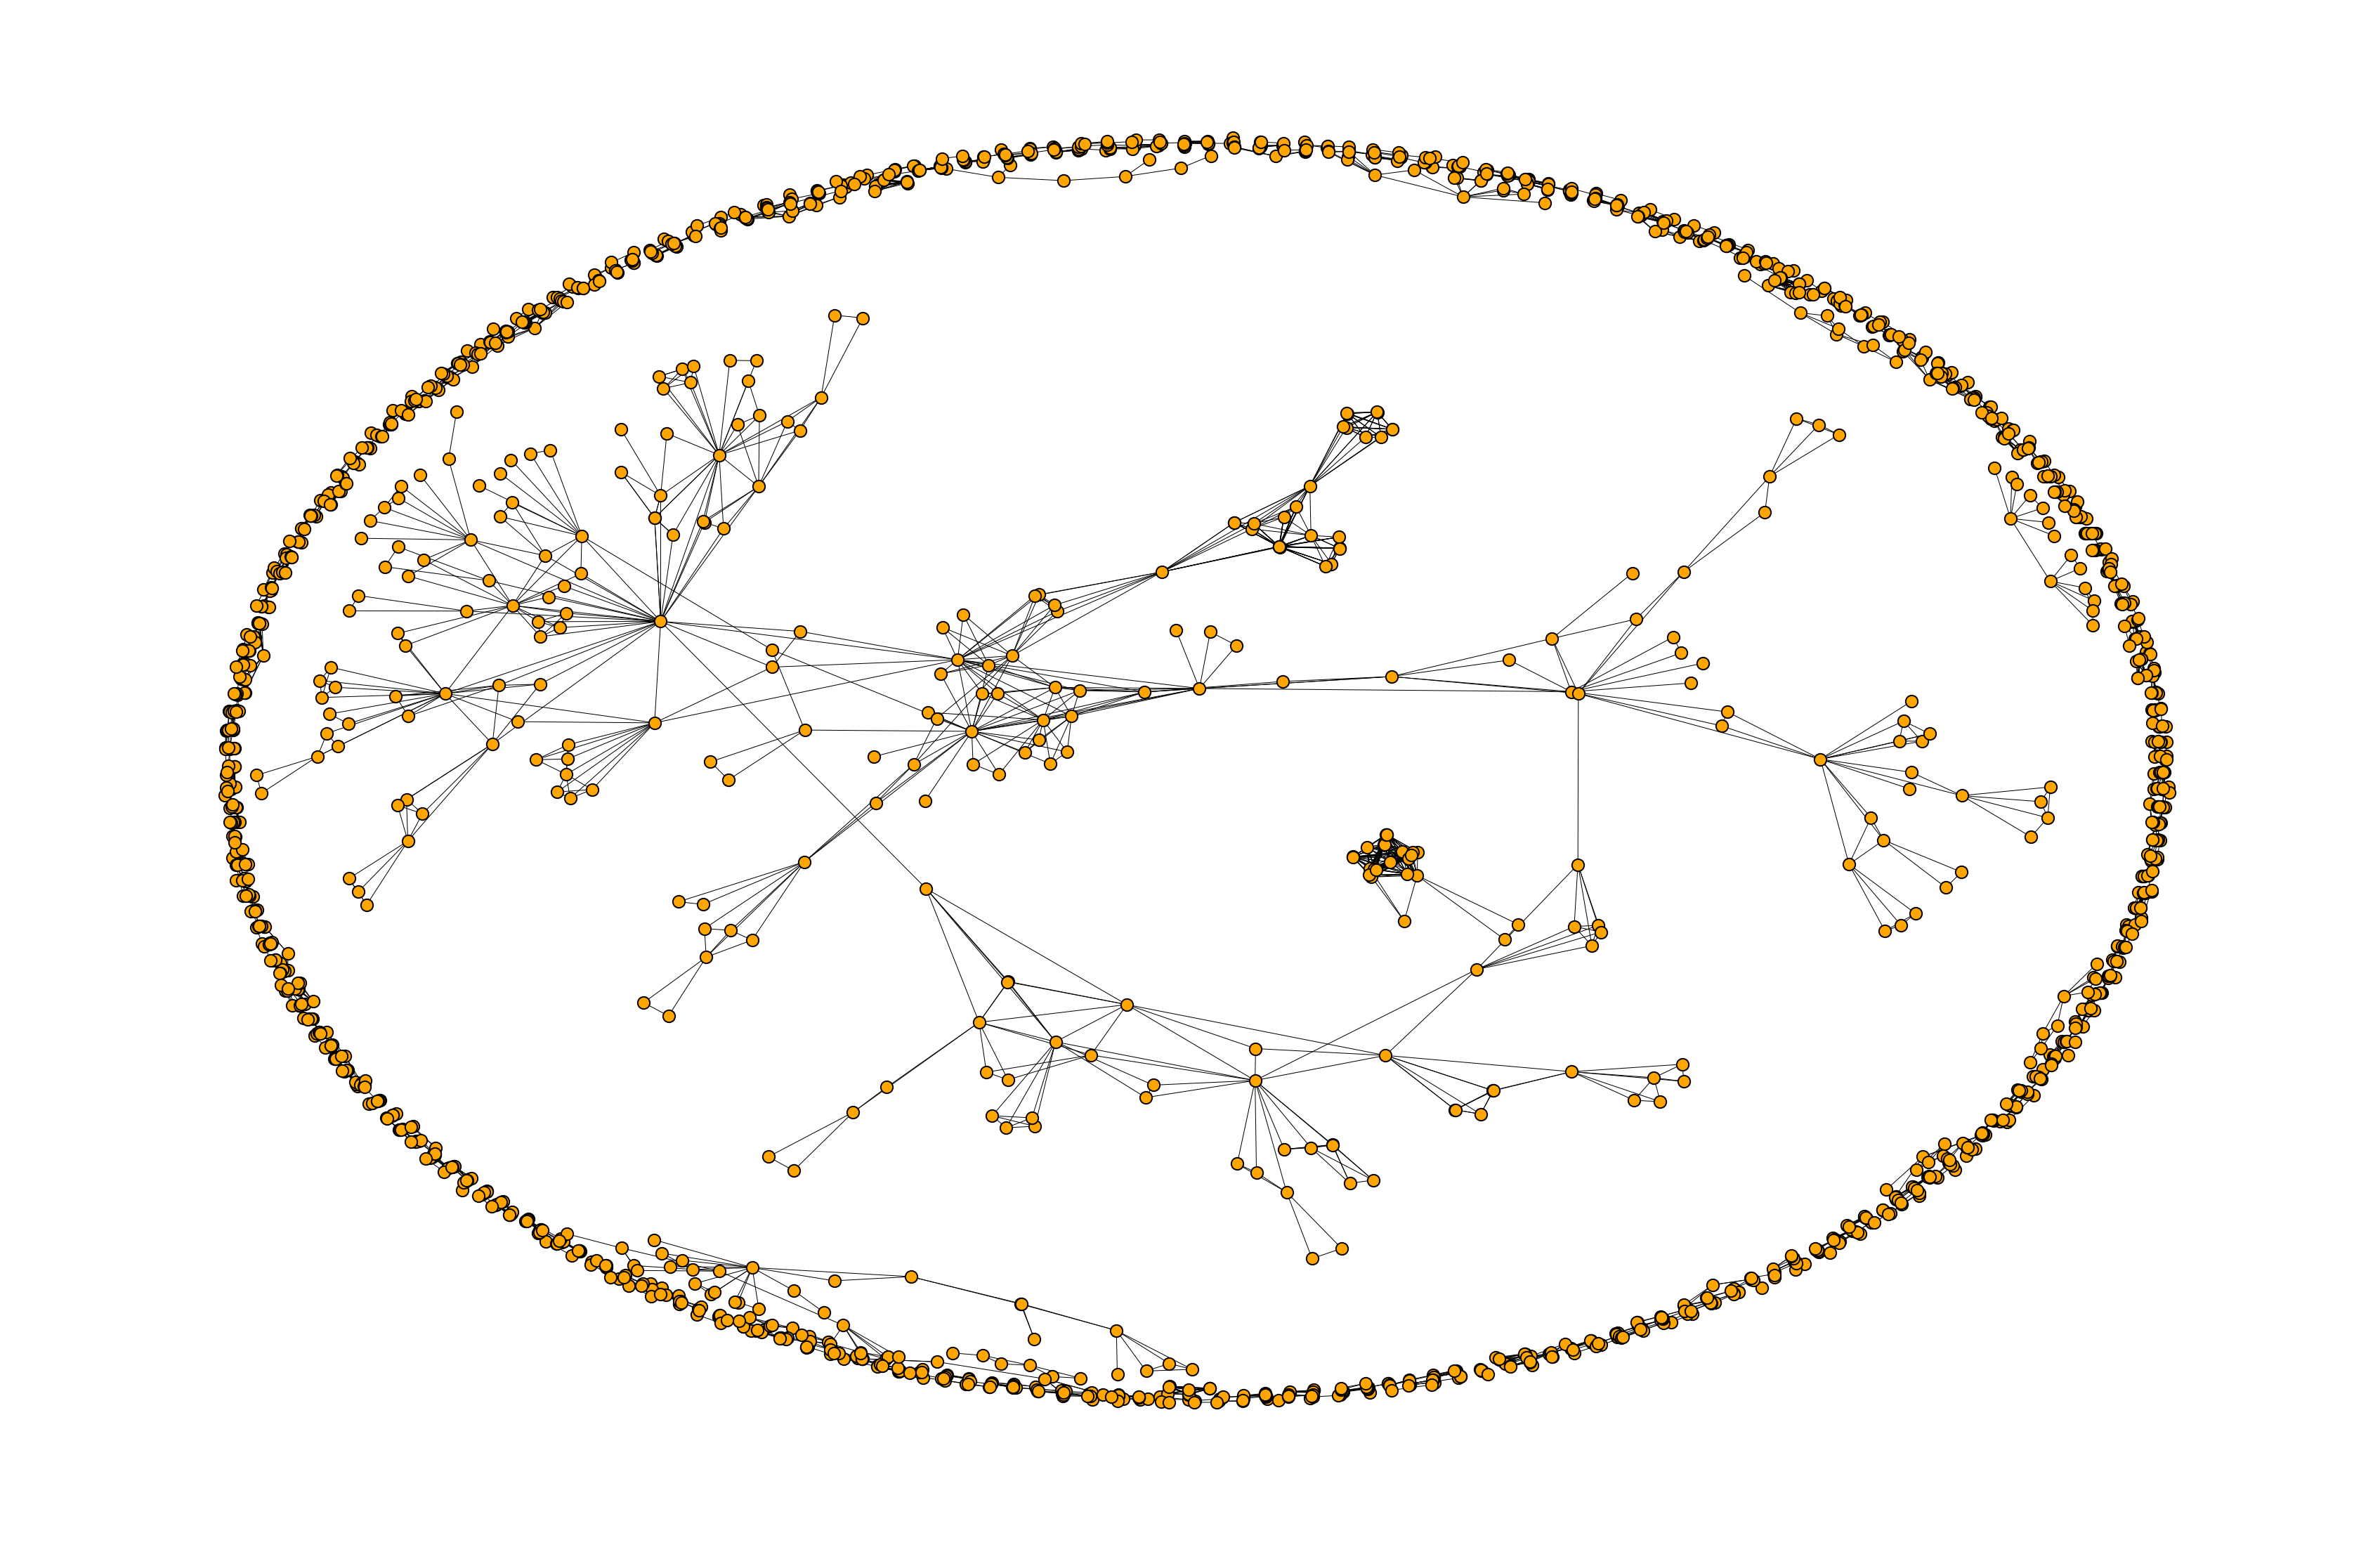

In [16]:
fig = plt.figure(figsize=(60, 40))

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(G, pos)

limits=plt.axis('off') 
#plt.show()
plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/co-authors-network.pdf", format='pdf', bbox_inches='tight')

Analysing co-authors network
-----------------------------

**Most published authors**

In [27]:
most_published = authors_num_papers.sort_values('unique_key').tail(10)
most_published.index = [name.title() for name in most_published.index]
most_published.columns = ['Number of publications']

In [28]:
most_published = most_published.sort_values('Number of publications', ascending=False)

In [25]:
file = open("/home/nightwing/rsc/Literature-Article/assets/most_published.tex", 'w')
file.write('{}'.format(pd.DataFrame(most_published).to_latex()))
file.close()

**Centrality**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. 
*wikipedia link: https://en.wikipedia.org/wiki/Centrality*

We could illustrate these names on the graph.

In [30]:
betweeness = sorted(nx.betweenness_centrality(G, normalized=True).items(), 
                    key=lambda x:x[1], reverse=True)[0:5]
betweeness = pd.DataFrame(betweeness, columns=['Author name', 'Betweeness'])
betweeness['Author name'] = [name.title() for name in betweeness['Author name']]
betweeness

,Author name,Betweeness
0,Matjaz Perc,0.010584
1,Yamir Moreno,0.008786
2,Luo-Luo Jiang,0.004319
3,Arne Traulsen,0.003920
4,Martin A. Nowak,0.003832


In [32]:
closeness_rank = sorted(nx.closeness_centrality(G, normalized=True).items(), 
                   key=lambda x:x[1], reverse=True)[0:5]
closeness_rank = pd.DataFrame(closeness_rank, columns=['Author name', 'Closeness'])
closeness_rank['Author name'] = [name.title() for name in closeness_rank['Author name']]
closeness_rank

,Author name,Closeness
0,Matjaz Perc,0.044428
1,Yamir Moreno,0.043561
2,Cheng-Yi Xia,0.038910
3,Sandro Meloni,0.037959
4,Alberto Aleta,0.037600


In [33]:
for centrality, label in zip([betweeness, closeness_rank],
                             ['betweness', 'closeness']):
    file = open("/home/nightwing/rsc/Literature-Article/assets/prisoners_centrality_{}.tex".format(label),
                'w')
    file.write('{}'.format(pd.DataFrame(centrality).to_latex()))
    file.close()